# Clinic vs pregnant women time comparison 

This notebook aims to compare the temporal trends between aggregate data from clinical cases and pregnant women.

Main goals:

- Quantify the consistency of the temporal evolution of malaria incidence or prevalence between the two data sources 

- Compare the temporal changes detected from the two sources of data

#### Importing packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import scipy.stats as sci_stats
from stat_tools import estimations
from pregmal_pytools import temporal_utils, notebook_pytools
from time import time

#### Importing data 

In [2]:
#Defining data paths
data_path = 'data/'
mipmon_filename = data_path + 'mipmon_merged.csv' 
rrs_filename = data_path + 'RRS_data_age.csv'
opd_filename = data_path + 'weekly_OPD_cases_2014_2019_6_posts.csv'
opd_5_filename = data_path + 'weekly_OPD_cases_2014_2019_6_age_5.csv'
#Using my newly generated aggregate OPD data
opd_5_filename = data_path + 'weekly_OPD_cases_2016_2019_age_5.csv'
opd_2to9_filename = data_path + 'weekly_OPD_cases_2014_2019_6_posts_age2to9.csv'

#Loading and preprocessing data
mipmon = pd.read_csv(mipmon_filename)
rrs = pd.read_csv(rrs_filename)
#rrs = rrs.rename(columns = {'yr' : 'year', 'mon' : 'month'})
rrs = rrs.sort_values(['yr', 'week'])
rrs['tot'] = rrs['tot_a'] #+ rrs['tot_b']
rrs['tot_test'] = rrs['tot_test_a'] #+ rrs['tot_test_b']
rrs['malaria'] = rrs['mal_a'] #+ rrs['mal_b']
opd = pd.read_csv(opd_filename)
opd_5 = pd.read_csv(opd_5_filename)
opd_2to9 = pd.read_csv(opd_2to9_filename)
#Reformating dates
mipmon['visdate'] = pd.to_datetime(mipmon['visdate'])
rrs['date'] = pd.to_datetime(rrs['yr'], format = "%Y") + pd.to_timedelta(7*rrs['week'], unit='D')
opd['date'] = pd.to_datetime(opd['year'], format = "%Y") + pd.to_timedelta(7*opd['week'], unit='D')
opd_5['date'] = pd.to_datetime(opd_5['year'], format = "%Y") + pd.to_timedelta(7*opd_5['week'], unit='D')
opd_2to9['date'] = pd.to_datetime(opd_2to9['year'], format = "%Y") + pd.to_timedelta(7*opd_2to9['week'], unit='D')
#Total aggregated data
total_rrs = rrs.groupby(by = 'date')[['tot', 'tot_test', 'malaria']].sum()#['tot_a', 'tot_b', 'tot', 'tot_test_a', 'tot_test_b', 'tot_test', 'mal_a', 'mal_b', 'malaria']].sum()
total_opd = opd.groupby(by = 'date')[['date', 'visits', 'malaria']].sum()
total_opd_5 = opd_5.groupby(by = 'date')[['date', 'visits', 'malaria']].sum()
total_opd_2to9 = opd_2to9.groupby(by = 'date')[['date', 'visits', 'malaria']].sum()
#Quantify tests
mipmon['pcrpos'][mipmon['pcrpos'] == 'PCR-'] = 0
mipmon['pcrpos'][mipmon['pcrpos'] == 'PCR+'] = 1

/tmp/ipykernel_209103/2596737509.py:30: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_opd = opd.groupby(by = 'date')[['date', 'visits', 'malaria']].sum()
/tmp/ipykernel_209103/2596737509.py:31: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_opd_5 = opd_5.groupby(by = 'date')[['date', 'visits', 'malaria']].sum()
/tmp/ipykernel_209103/2596737509.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_opd_2to9

In [3]:
#Building incidence 
opd_2to9['incidence'] = 0
rrs['incidence'] = 52802*.7 #Magude Sede is approximately 70% of all population in Magude
place = 'Ilha Josina'
mask = (opd_2to9['place'] == place)&(opd_2to9['date'] < '2016-07-01')
opd_2to9['incidence'].loc[mask] = 2389*np.ones(np.sum(mask))
mask = (opd_2to9['place'] == place)&(opd_2to9['date'] >= '2016-07-01')&(opd_2to9['date'] < '2017-07-01')
opd_2to9['incidence'].loc[mask] = 2353*np.ones(np.sum(mask))
mask = (opd_2to9['place'] == place)&(opd_2to9['date'] >= '2017-07-01')&(opd_2to9['date'] < '2018-07-01')
opd_2to9['incidence'].loc[mask] = 2346*np.ones(np.sum(mask))
mask = (opd_2to9['place'] == place)&(opd_2to9['date'] >= '2018-07-01')&(opd_2to9['date'] < '2019-07-01')
opd_2to9['incidence'].loc[mask] = 2262*np.ones(np.sum(mask))
mask = (opd_2to9['place'] == place)&(opd_2to9['date'] >= '2019-07-01')&(opd_2to9['date'] < '2020-07-01')
opd_2to9['incidence'].loc[mask] = 2304*np.ones(np.sum(mask))

place = 'Manhiça'
mask = (opd_2to9['place'] == place)&(opd_2to9['date'] < '2016-07-01')
opd_2to9['incidence'].loc[mask] = 9417*np.ones(np.sum(mask))
mask = (opd_2to9['place'] == place)&(opd_2to9['date'] >= '2016-07-01')&(opd_2to9['date'] < '2017-07-01')
opd_2to9['incidence'].loc[mask] = 9470*np.ones(np.sum(mask))
mask = (opd_2to9['place'] == place)&(opd_2to9['date'] >= '2017-07-01')&(opd_2to9['date'] < '2018-07-01')
opd_2to9['incidence'].loc[mask] = 9712*np.ones(np.sum(mask))
mask = (opd_2to9['place'] == place)&(opd_2to9['date'] >= '2018-07-01')&(opd_2to9['date'] < '2019-07-01')
opd_2to9['incidence'].loc[mask] = 9857*np.ones(np.sum(mask))
mask = (opd_2to9['place'] == place)&(opd_2to9['date'] >= '2019-07-01')&(opd_2to9['date'] < '2020-07-01')
opd_2to9['incidence'].loc[mask] = 9760*np.ones(np.sum(mask))



/tmp/ipykernel_209103/12002664.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opd_2to9['incidence'].loc[mask] = 2389*np.ones(np.sum(mask))
/tmp/ipykernel_209103/12002664.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opd_2to9['incidence'].loc[mask] = 2353*np.ones(np.sum(mask))
/tmp/ipykernel_209103/12002664.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opd_2to9['incidence'].loc[mask] = 2346*np.ones(np.sum(mask))
/tmp/i

### Define functions 

In [4]:
def clinic_pw_comp(mipmon, rrs, opd_5, mipmon_selection, all_mipmon_areas, all_clinic_areas, mipmon_bins, \
                  time_shift = 0, norm = True, clinic_val = 'cases', mip_test_type = 'pcr', rounding = 3, \
                   get_pcc = False, mipmon_prev_r = None):
    colors = [cm.turbo((i+1)/float(len(mipmon_selection) + 1)) for i in range(len(mipmon_selection) + 1)]
    
    chi2_results = {}
    mean_errs = {}
    pcorr_results = {}
    pcorr_95CI = {}
    pcorr_68CI = {}
    if mipmon_bins == 3:
        changes = {}
    for i, mipmon_areas in enumerate(all_mipmon_areas):
        chi2_results[mipmon_areas[0]] = {}
        mean_errs[mipmon_areas[0]] = {}
        pcorr_results[mipmon_areas[0]] = {}
        pcorr_95CI[mipmon_areas[0]] = {}
        pcorr_68CI[mipmon_areas[0]] = {}
        clinic_areas = all_clinic_areas[i]
        if mipmon_bins == 3:
            changes['1st yr in ' + mipmon_areas[0]] = {}
            changes['2nd yr in ' + mipmon_areas[0]] = {}
        print(mipmon_areas[0])
        for j,s in enumerate(mipmon_selection):
            mipmon_mask = mipmon_selection[s]
            if get_pcc and mipmon_prev_r is None:
                    dates, mipmon_prev, mipmon_err, clinic_bins, clinic_err, mipmon_prev_resample = \
                                notebook_pytools.clinic_mipmon_bins(mipmon, rrs, opd_5, mipmon_areas, \
                                                                    clinic_areas, mipmon_bins, \
                                                                    time_shift = time_shift, norm = norm, \
                                                                    mipmon_mask = mipmon_mask, \
                                                                    clinic_val = clinic_val, \
                                                                    mip_test_type = mip_test_type, \
                                                                   ret_resamples = True)
            else:
                dates, mipmon_prev, mipmon_err, clinic_bins, clinic_err = \
                                notebook_pytools.clinic_mipmon_bins(mipmon, rrs, opd_5, mipmon_areas, \
                                                                    clinic_areas, mipmon_bins, \
                                                                    time_shift = time_shift, norm = norm, \
                                                                    mipmon_mask = mipmon_mask, \
                                                                    clinic_val = clinic_val, \
                                                                    mip_test_type = mip_test_type)
        
            mask = (mipmon_err>0)&(clinic_err>0)&(mipmon_prev>0)&(clinic_bins>0)
            if get_pcc:
                if mipmon_prev_r is not None:
                    mipmon_prev_resample = mipmon_prev_r
                chi2, k, pcorr, conf_68, conf_95 = \
                notebook_pytools.get_clinic_amplitude_chi2(mipmon_prev[mask], mipmon_err[mask], \
                                                                 clinic_bins[mask], clinic_err[mask], \
                                                          get_pcc = True, mipmon_prev_r = mipmon_prev_resample[mask])
            else:
                chi2, k = notebook_pytools.get_clinic_amplitude_chi2(mipmon_prev[mask], mipmon_err[mask], \
                                                                 clinic_bins[mask], clinic_err[mask])
            chi2_results[mipmon_areas[0]][s] = round(chi2, rounding)
            mean_errs[mipmon_areas[0]][s] = round(np.mean(mipmon_err[mask]), rounding)
            pcorr_results[mipmon_areas[0]][s] = round(pcorr, rounding)
            pcorr_68CI[mipmon_areas[0]][s] = [round(conf_68[0], rounding),round(conf_68[1], rounding)]
            pcorr_95CI[mipmon_areas[0]][s] = [round(conf_95[0], rounding),round(conf_95[1], rounding)]
            if mipmon_bins == 3:
                if j == 0:
                    changes['1st yr in ' + mipmon_areas[0]]['clinics'] = round(clinic_bins[1]/clinic_bins[0], rounding)
                    changes['2nd yr in ' + mipmon_areas[0]]['clinics'] = round(clinic_bins[2]/clinic_bins[0], rounding)
                changes['1st yr in ' + mipmon_areas[0]][s] = round(mipmon_prev[1]/mipmon_prev[0], rounding)
                changes['2nd yr in ' + mipmon_areas[0]][s] = round(mipmon_prev[2]/mipmon_prev[0], rounding)
            print(s, chi2, k)
            if j == 0:
                plt.errorbar(dates, k*clinic_bins, k*clinic_err, lw = 3, label = 'Clinical cases', c = 'k')
            plt.errorbar(dates, mipmon_prev, mipmon_err, label = s, c = colors[j], lw = 3)
        plt.legend()
        plt.xlabel('Date')
        plt.ylabel(r'$\rm{PR}_{\rm{'+mip_test_type.upper()+'}}$/' + clinic_val)
        plt.xticks(dates[::int(len(dates)/4)])
        plt.title(str_replace(mipmon_areas[0], '-', ' '))
        plt.show()
    if mipmon_bins == 3:
        return chi2_results, changes
    else:
        if get_pcc:
            return chi2_results, mean_errs, pcorr_results, pcorr_95CI, pcorr_68CI
        else:
            return chi2_results, mean_errs


In [5]:
def str_replace(text, ch1, ch2):
    new_text = ''
    for i in text:
        if i == ch1:
            new_text += ch2
        else:
            new_text += i
    return new_text

In [6]:
def chi2_vs_timeshift(mipmon, rrs, opd_5, mipmon_selection, all_ts, all_mipmon_areas, all_clinic_areas, \
                     mipmon_bins, clinic_val, mip_test_type, show_all = False, show_all_means = False):
    lstyles = ['-.', '--', ':']
    colors = [cm.turbo((i+1)/float(len(mipmon_selection) + 1)) for i in range(len(mipmon_selection) + 1)]
    all_chi2_mean = np.zeros(len(all_ts))
    all_pcorr_mean = np.zeros(len(all_ts))
    for j,s in enumerate(mipmon_selection):
        mipmon_mask = mipmon_selection[s]
        chi2_vs_t = {}
        pcorr_vs_t = {}
        for i, mipmon_areas in enumerate(all_mipmon_areas):
            clinic_areas = all_clinic_areas[i]
            chi2_vs_t[mipmon_areas[0]] = []
            pcorr_vs_t[mipmon_areas[0]] = []
            for ts in all_ts:
                dates, mipmon_prev, mipmon_err, clinic_bins, clinic_err = \
                                notebook_pytools.clinic_mipmon_bins(mipmon, rrs, opd_5, mipmon_areas, \
                                                                    clinic_areas, mipmon_bins, \
                                                                    time_shift = ts, norm = True, \
                                                                    mipmon_mask = mipmon_mask, \
                                                                    clinic_val = clinic_val, \
                                                                   mip_test_type = mip_test_type)
    
                mask = (mipmon_err>0)&(clinic_err>0)&(mipmon_prev>0)&(clinic_bins>0)
                chi2, k, pcorr = notebook_pytools.get_clinic_amplitude_chi2(mipmon_prev[mask], mipmon_err[mask], \
                                                                 clinic_bins[mask], clinic_err[mask], \
                                                                           get_pcc = True)
                chi2_vs_t[mipmon_areas[0]].append(chi2)
                pcorr_vs_t[mipmon_areas[0]].append(pcorr)
            chi2_vs_t[mipmon_areas[0]] = np.array(chi2_vs_t[mipmon_areas[0]])
            pcorr_vs_t[mipmon_areas[0]] = np.array(pcorr_vs_t[mipmon_areas[0]])
            if show_all:
                plt.figure(0)
                plt.plot(all_ts, chi2_vs_t[mipmon_areas[0]], label = mipmon_areas[0] + ' ' + s, c = colors[j], lw = 3, linestyle = lstyles[i])
                plt.figure(1)
                plt.plot(all_ts, pcorr_vs_t[mipmon_areas[0]], label = mipmon_areas[0] + ' ' + s, c = colors[j], lw = 3, linestyle = lstyles[i])
        chi2_vs_t['Mean'] = (chi2_vs_t['Magude-sede'] + chi2_vs_t['Manhica-Sede'] + chi2_vs_t['Ilha-Josina'])/3.
        pcorr_vs_t['Mean'] = (pcorr_vs_t['Magude-sede'] + pcorr_vs_t['Manhica-Sede'] + pcorr_vs_t['Ilha-Josina'])/3.
        all_chi2_mean += chi2_vs_t['Mean']
        all_pcorr_mean += pcorr_vs_t['Mean']
        plt.figure(0)
        plt.plot(all_ts, chi2_vs_t['Mean'], label = 'Mean ' + s, c = colors[j], lw = 3, linestyle = '-')
        plt.figure(1)
        plt.plot(all_ts, pcorr_vs_t['Mean'], label = 'Mean ' + s, c = colors[j], lw = 3, linestyle = '-')
    if show_all_means:
        all_chi2_mean /= (j+1)
        all_pcorr_mean /= (j+1)
        plt.figure(0)
        plt.plot(all_ts, all_chi2_mean, label = 'Total mean', c = 'k', lw = 3, linestyle = '-')
        plt.figure(1)
        plt.plot(all_ts, all_pcorr_mean, label = 'Total mean', c = 'k', lw = 3, linestyle = '-')
    plt.figure(0)
    plt.legend()
    plt.xlabel('Time shift (days)')
    plt.ylabel(r'$\chi^2$')
    plt.figure(1)
    plt.legend()
    plt.xlabel('Time shift (days)')
    plt.ylabel(r'Pearson Correlation Coefficient')
    plt.show()


### Define masks 

In [7]:
#Define masks for MiPMon data
mipmon_pn = mipmon['visit'] == 'PN'
mipmon_pg = mipmon_pn&(mipmon['gestnum'] == 1)
mipmon_sg = mipmon_pn&(mipmon['gestnum'] == 2)
mipmon_12g = mipmon_pn&(mipmon['gestnum'] <= 2)
mipmon_mg = mipmon_pn&(mipmon['gestnum'] > 1)
mipmon_3g = mipmon_pn&(mipmon['gestnum'] > 2)
mipmon_hiv_pos = mipmon_pn&(mipmon['hiv'] == 'HIV+')
mipmon_hiv_neg = mipmon_pn&(mipmon['hiv'] == 'HIV-')
mipmon_pg_hiv_pos = mipmon_pg&mipmon_hiv_pos
mipmon_pg_hiv_neg = mipmon_pg&mipmon_hiv_neg

mipmon_selection = {
    'All prenatal' : mipmon_pn,
    'Primigravid' : mipmon_pg,
    #'Secundigravid' : mipmon_sg,
    #'1-2gravid' : mipmon_12g,
    #'>2gravid' : mipmon_3g,
    'Multigravid' : mipmon_mg,
    'HIV+' : mipmon_hiv_pos,
    'HIV-' : mipmon_hiv_neg,
    #'PG HIV+' : mipmon_pg_hiv_pos,
    'Primigravid HIV-' : mipmon_pg_hiv_neg,
}

mipmon_has_pcr = mipmon['pcrpos'].notnull()

### Parameters 

In [8]:
mipmon_bins = 9
colors = [cm.turbo((i+1)/float(len(mipmon_selection) + 1)) for i in range(len(mipmon_selection) + 1)]

In [9]:
#Regions to compare
all_mipmon_areas = [['Magude-sede'], ['Ilha-Josina'], ['Manhica-Sede']]
all_clinic_areas = [['cs_magude', 'cs_facazissa'], ['Ilha Josina'], ['Manhiça']]


# Plots for manuscripts and presentations

Magude-sede
1.531346075568622 [0.01597613] 0.8142791417191991 [0.6232028049183975, 0.8324405311692856] [0.47168818057132056, 0.9050768523049424]
Magude-sede
2.157718761247724 [0.0229829] 0.5605709129199963 [0.20972043521810602, 0.6419734077336483] [-0.34377971862062695, 0.7627037266964953]
Magude-sede
0.7777937464914108 [0.01319116] 0.8693218066075662 [0.6452425601084524, 0.8633180149923775] [0.49554900846914274, 0.9237972535891834]


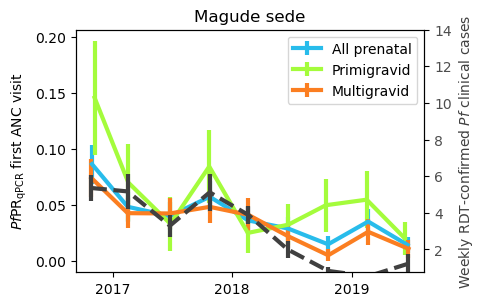

Ilha-Josina
1.7790768578030043 [0.01675095] 0.6647367144676495 [0.448301531500533, 0.7260833005919072] [0.2914076896365218, 0.8379683436697964]
Ilha-Josina
1.010984436667907 [0.02216395] 0.6255538913245741 [0.27156290665694993, 0.7178066755358803] [-0.02776691063144246, 0.826025538811636]
Ilha-Josina
1.27059755234861 [0.0148886] 0.686953137582282 [0.4468329002630161, 0.7505600772116111] [0.25318556553587446, 0.845823432410253]


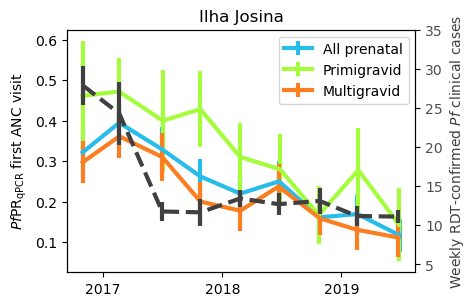

Manhica-Sede
1.9862113568954518 [0.00499177] 0.8701476290964241 [0.7262281209529264, 0.8905758338073169] [0.6251055802061963, 0.9355984812550697]
Manhica-Sede
3.461420724062463 [0.00823312] 0.572896512270245 [0.23177029343787253, 0.6877778823379823] [-0.01094487728844179, 0.8257800642424584]
Manhica-Sede
1.0589456905788706 [0.00379449] 0.9031115069221167 [0.753747936913377, 0.9090913501047729] [0.6345304275433059, 0.9534379827092345]


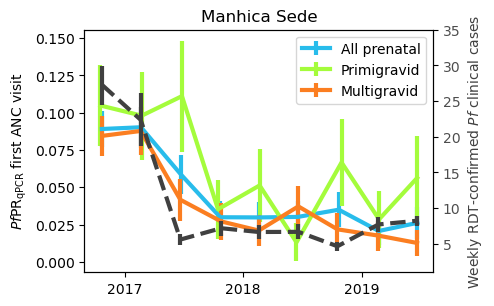

Time taken  13.858255863189697  seconds ( 0 minutes)


In [10]:
mipmon_bins = 9
clinic_val = 'cases'
mip_test_type = 'pcr'
time_shift = 70
selections = ['All prenatal', 'Primigravid', 'Multigravid']
colors_pw = [cm.turbo((i+1)/float(len(selections) + 1)) for i in range(len(selections) + 1)]

start = time()

for i, mipmon_areas in enumerate(all_mipmon_areas):
    clinic_areas = all_clinic_areas[i]
    fig, ax1 = plt.subplots(figsize = [.9*5,.9*3.5])
    for j,s in enumerate(selections):
        mipmon_mask = mipmon_selection[s]
        dates, mipmon_prev, mipmon_err, clinic_bins, clinic_err, mipmon_prev_r = \
                                notebook_pytools.clinic_mipmon_bins(mipmon, rrs, opd_5, mipmon_areas, \
                                                                    clinic_areas, mipmon_bins, \
                                                                    time_shift = time_shift, norm = False, \
                                                                    mipmon_mask = mipmon_mask, \
                                                                    clinic_val = clinic_val, \
                                                                   mip_test_type = mip_test_type, \
                                                                   ret_resamples = True)
    
        mask = (mipmon_err>0)&(clinic_err>0)&(mipmon_prev>0)&(clinic_bins>0)
        chi2, k, pcorr, pcorr_68, pcorr_95 = notebook_pytools.get_clinic_amplitude_chi2(mipmon_prev[mask], mipmon_err[mask], \
                                                                 clinic_bins[mask], clinic_err[mask], \
                                                                    get_pcc = True, \
                                                                    mipmon_prev_r = mipmon_prev_r[mask])
        
        ax1.errorbar(dates[mask], mipmon_prev[mask], mipmon_err[mask], label = s, c = colors_pw[j], lw = 3)
        print(mipmon_areas[0])
        print(chi2, k, pcorr, pcorr_68, pcorr_95)
        #plt.xlabel('Date')
    ax1.set_ylabel(r'$Pf\rm{PR}_{\rm{qPCR}}$ first ANC visit')#, color = 'blue')
    ax1.tick_params(axis='y')#, colors='blue')
    plt.legend()
    ax2 = ax1.twinx()
    ax2.tick_params(axis ='y', labelcolor = colors[j]) 
    ax2.set_ylabel(r'Weekly RDT-confirmed $Pf$ clinical cases', color = [.25,.25,.25])
    ax2.errorbar(dates, clinic_bins, clinic_err, lw = 3, label = 'Clinical cases', c = [.25,.25,.25], linestyle = '--')
    ax2.tick_params(axis ='y', labelcolor = [.3,.3,.3])
    ymaxs = {'Magude-sede': 14, 'Ilha-Josina' : 35, 'Manhica-Sede' : 35}
    ymins = {'Magude-sede': .75, 'Ilha-Josina' : 4, 'Manhica-Sede' : 1}
    ax2.set_ylim(ymin = ymins[mipmon_areas[0]], ymax = ymaxs[mipmon_areas[0]])
    plt.xticks(pd.to_datetime(['2017', '2018', '2019']), labels = ['2017', '2018', '2019'])
    plt.title(str_replace(mipmon_areas[0], '-', ' '))
    plt.show()
end = time()
print('Time taken ', end-start,' seconds (', int((end-start)/60), 'minutes)')

### Time shift minimisations 

In [11]:
def get_result_df(min_chi2, max_pcorr, time_lag_pcorr, pcorr_vs_t, pcorr975_vs_t, pcorr025_vs_t):
    pcr_results = {
    r'$\chi^2$' : min_chi2, 
    'PCC' : max_pcorr, 
    'PCC bot 95%CI' : {},
    'PCC top 95%CI' : {},
    'Time lag' : time_lag_pcorr, 
    }
    for s in max_pcorr:
        w = np.where(pcorr_vs_t[s]['Mean'] == max_pcorr[s])[0]
        pcr_results['PCC top 95%CI'][s] = pcorr975_vs_t[s]['Mean'][w][0]
        pcr_results['PCC bot 95%CI'][s] = pcorr025_vs_t[s]['Mean'][w][0]
    
    return pd.DataFrame(pcr_results)

### TODO running this for finer time granularity

cases pcr


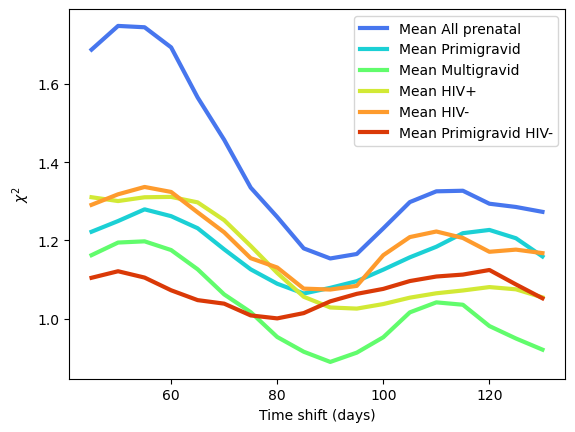

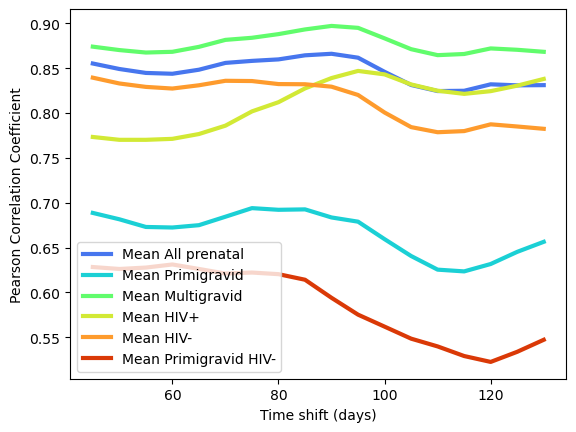

Time taken  512.8983836174011  seconds ( 8 minutes)


In [12]:
start = time()

mipmon_bins = 6
all_ts = range(30, 150, 5)
clinic_val = 'cases'
mip_test_type = 'pcr'
print(clinic_val, mip_test_type)
min_chi2_6b, max_pcorr_6b, time_lag_chi2_6b, time_lag_pcorr_6b, chi2_mean_6b, pcorr_mean_6b, \
all_ts_6b, pcorr_vs_t_6b, pcorr025_vs_t_6b, \
pcorr975_vs_t_6b = temporal_utils.chi2_vs_timeshift(mipmon, rrs, opd_5, mipmon_selection, \
                                                 all_ts, all_mipmon_areas, all_clinic_areas, \
                                                 mipmon_bins, clinic_val, mip_test_type, \
                                                 show_all_means=False, show_all = False, \
                                                get_CI = True, convolve_size = 3)


lstyles = ['--', ':', '-.']
colors = [cm.turbo((i+1)/float(len(mipmon_selection) + 1)) for i in range(len(mipmon_selection) + 1)]

end = time()
print('Time taken ', end-start,' seconds (', int((end-start)/60), 'minutes)')

In [13]:
get_result_df(min_chi2_6b, max_pcorr_6b, \
              time_lag_pcorr_6b, pcorr_vs_t_6b, \
              pcorr975_vs_t_6b, pcorr025_vs_t_6b)

,$\chi^2$,PCC,PCC bot 95%CI,PCC top 95%CI,Time lag
All prenatal,1.154077,0.866037,0.687591,0.923720,90
Primigravid,1.064453,0.694021,0.276600,0.805002,75
Multigravid,0.889584,0.897075,0.685926,0.933849,90
HIV+,1.025896,0.846928,0.300851,0.867164,95
HIV-,1.074611,0.839398,0.436197,0.893369,45
Primigravid HIV-,1.000869,0.631238,0.140718,0.773390,60


In [14]:
get_result_df(min_chi2_6b, max_pcorr_6b, \
              time_lag_pcorr_6b, pcorr_vs_t_6b, \
              pcorr975_vs_t_6b, pcorr025_vs_t_6b)

,$\chi^2$,PCC,PCC bot 95%CI,PCC top 95%CI,Time lag
All prenatal,1.154077,0.866037,0.687591,0.923720,90
Primigravid,1.064453,0.694021,0.276600,0.805002,75
Multigravid,0.889584,0.897075,0.685926,0.933849,90
HIV+,1.025896,0.846928,0.300851,0.867164,95
HIV-,1.074611,0.839398,0.436197,0.893369,45
Primigravid HIV-,1.000869,0.631238,0.140718,0.773390,60


# RDT

In [15]:
### TODO running this for finer time granularity

cases rdt


/home/isglobal.lan/apujol/anaconda3/envs/py38/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:492: RuntimeWarning: Number of calls to function has reached maxfev = 400.
  warnings.warn(errors[info][0], RuntimeWarning)
/home/isglobal.lan/apujol/anaconda3/envs/py38/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


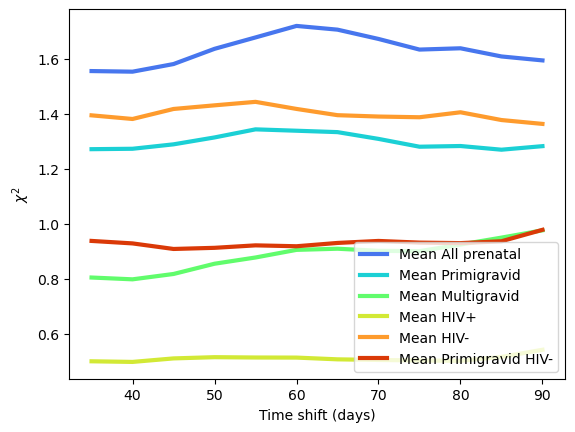

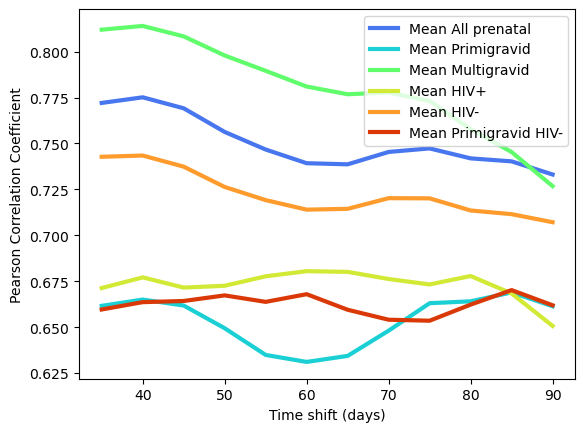

Time taken  254.86166214942932  seconds ( 4 minutes)


In [16]:
start = time()

mipmon_bins = 6
all_ts = range(20, 110, 5)
clinic_val = 'cases'
mip_test_type = 'rdt'
print(clinic_val, mip_test_type)
min_chi2_6b_rdt, max_pcorr_6b_rdt, time_lag_chi2_6b_rdt, time_lag_pcorr_6b_rdt, chi2_mean_6b_rdt, pcorr_mean_6b_rdt, \
all_ts_6b_rdt, pcorr_vs_t_6b_rdt, pcorr025_vs_t_6b_rdt, \
pcorr975_vs_t_6b_rdt = temporal_utils.chi2_vs_timeshift(mipmon, rrs, opd_5, mipmon_selection, \
                                                 all_ts, all_mipmon_areas, all_clinic_areas, \
                                                 mipmon_bins, clinic_val, mip_test_type, \
                                                 show_all_means=False, show_all = False, \
                                                get_CI = True, convolve_size = 3)


lstyles = ['--', ':', '-.']
colors = [cm.turbo((i+1)/float(len(mipmon_selection) + 1)) for i in range(len(mipmon_selection) + 1)]

end = time()
print('Time taken ', end-start,' seconds (', int((end-start)/60), 'minutes)')

In [17]:
get_result_df(min_chi2_6b_rdt, max_pcorr_6b_rdt, \
              time_lag_pcorr_6b_rdt, pcorr_vs_t_6b_rdt, \
              pcorr975_vs_t_6b_rdt, pcorr025_vs_t_6b_rdt)

,$\chi^2$,PCC,PCC bot 95%CI,PCC top 95%CI,Time lag
All prenatal,1.552341,0.775135,0.285673,0.857899,40
Primigravid,1.269184,0.668902,0.134305,0.779631,85
Multigravid,0.798809,0.814004,0.268196,0.861377,40
HIV+,0.499115,0.680470,0.015995,0.823046,60
HIV-,1.362813,0.743438,0.212114,0.830585,40
Primigravid HIV-,0.908999,0.670161,0.198414,0.781322,85
